Boolean Equation:
(((x1 xor x2) and (x3 xnor x4)) or ((x5 or x6) nand (x7 nor x8)))


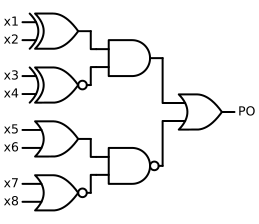

In [1]:
def parse_netlist(netlist):
    gates = {}
    for line in netlist.split('\n')[1:]:
        if line.strip():  # Skip empty lines
            parts = line.split()
            gate_num = int(parts[0])
            gate_type = parts[2]  # Adjusted to get the gate type correctly
            fanout = int(parts[3])
            fanin1 = int(parts[5]) if parts[5] != '-' else None
            fanin2 = int(parts[6]) if parts[6] != '-' else None
            gates[gate_num] = {'type': gate_type, 'fanout': fanout, 'fanin1': fanin1, 'fanin2': fanin2}
    return gates

def generate_boolean_equation(gates):
    def get_boolean_expression(gate_num):
        gate = gates[gate_num]
        if gate['type'] == 'inpt':
            return f'x{gate_num}'
        elif gate['type'] == 'and':
            fanin1_expr = get_boolean_expression(gate['fanin1'])
            fanin2_expr = get_boolean_expression(gate['fanin2'])
            return f'({fanin1_expr} and {fanin2_expr})'
        elif gate['type'] == 'or':
            fanin1_expr = get_boolean_expression(gate['fanin1'])
            fanin2_expr = get_boolean_expression(gate['fanin2'])
            return f'({fanin1_expr} or {fanin2_expr})'
        elif gate['type'] == 'nor':
            fanin1_expr = get_boolean_expression(gate['fanin1'])
            fanin2_expr = get_boolean_expression(gate['fanin2'])
            return f'({fanin1_expr} nor {fanin2_expr})'
        elif gate['type'] == 'nand':
            fanin1_expr = get_boolean_expression(gate['fanin1'])
            fanin2_expr = get_boolean_expression(gate['fanin2'])
            return f'({fanin1_expr} nand {fanin2_expr})'
        elif gate['type'] == 'xor':
            fanin1_expr = get_boolean_expression(gate['fanin1'])
            fanin2_expr = get_boolean_expression(gate['fanin2'])
            return f'({fanin1_expr} xor {fanin2_expr})'
        elif gate['type'] == 'xnor':
            fanin1_expr = get_boolean_expression(gate['fanin1'])
            fanin2_expr = get_boolean_expression(gate['fanin2'])
            return f'({fanin1_expr} xnor {fanin2_expr})'
        elif gate['type'] == 'not':
            fanin1_expr = get_boolean_expression(gate['fanin1'])
            fanin2_expr = get_boolean_expression(gate['fanin2'])
            return f'(not {fanin1_expr})'

    output_gate = max(gates.keys())
    return get_boolean_expression(output_gate)

# Read netlist from a .txt file
file_path = r'E:\NIRMA STUDY MATERIAL\SEM 6\TVDC\SPECIAL ASSIGNMENT\fwd\Net_final.txt'  # Update with the path to your .txt file
with open(file_path, 'r') as file:
    netlist = file.read()

gates = parse_netlist(netlist)
boolean_equation = generate_boolean_equation(gates)
print("Boolean Equation:")
print(boolean_equation)
from schemdraw.parsing import logicparse
logicparse(boolean_equation,outlabel='PO')